#  mpg based on given features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df= pd.read_csv("auto-mpg.csv")

In [3]:
df.shape

(398, 9)

In [4]:
df.head()
#disp=displacement
#mpg=mile per gallon
#

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
133,16.0,6,250.0,100,3781,17.0,74,1,chevrolet chevelle malibu classic
64,15.0,8,318.0,150,4135,13.5,72,1,plymouth fury iii
72,15.0,8,304.0,150,3892,12.5,72,1,amc matador (sw)
385,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx
238,33.5,4,98.0,83,2075,15.9,77,1,dodge colt m/m
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
151,31.0,4,79.0,67,2000,16.0,74,2,fiat x1.9
198,33.0,4,91.0,53,1795,17.4,76,3,honda civic
94,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
386,25.0,6,181.0,110,2945,16.4,82,1,buick century limited


In [6]:
df.describe(include="all")

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


###  car name - are categoical
### hp has "?" in it, so it is showing as catergorical, but it is not!

In [8]:
df.isnull()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cyl'}>,
        <AxesSubplot:title={'center':'disp'}>],
       [<AxesSubplot:title={'center':'wt'}>,
        <AxesSubplot:title={'center':'acc'}>,
        <AxesSubplot:title={'center':'yr'}>],
       [<AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

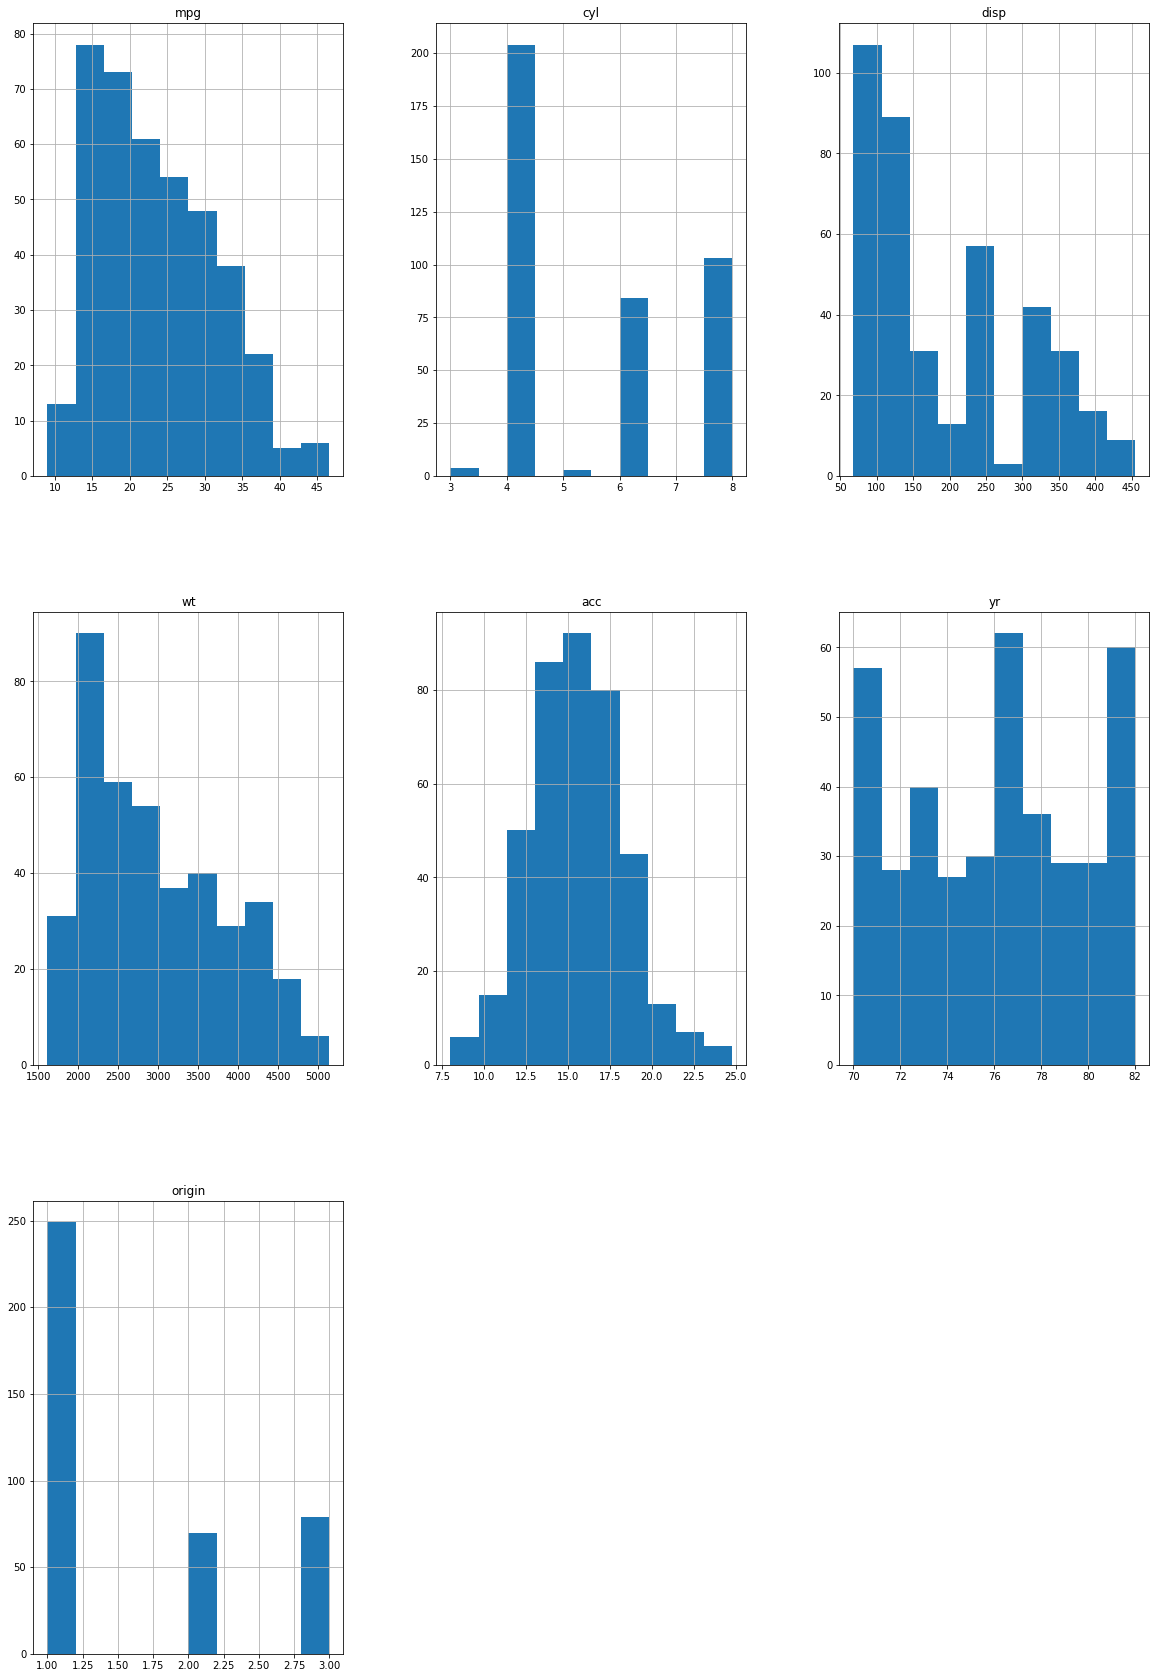

In [10]:
df.hist(figsize=(20,30))

<AxesSubplot:xlabel='origin', ylabel='mpg'>

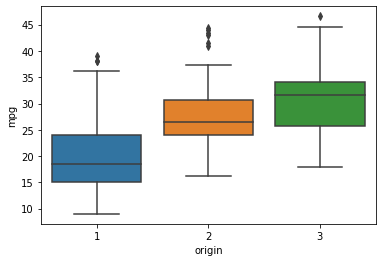

In [17]:
sns.boxplot(x="origin",y="mpg",data=df)


<AxesSubplot:xlabel='yr', ylabel='mpg'>

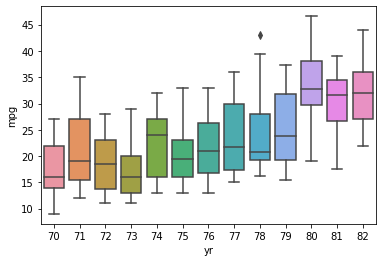

In [18]:
sns.boxplot(x="yr",y="mpg",data=df)

<AxesSubplot:xlabel='cyl', ylabel='mpg'>

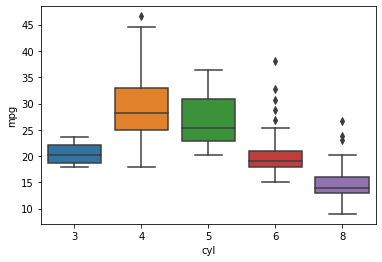

In [19]:
sns.boxplot(x="cyl",y="mpg",data=df)

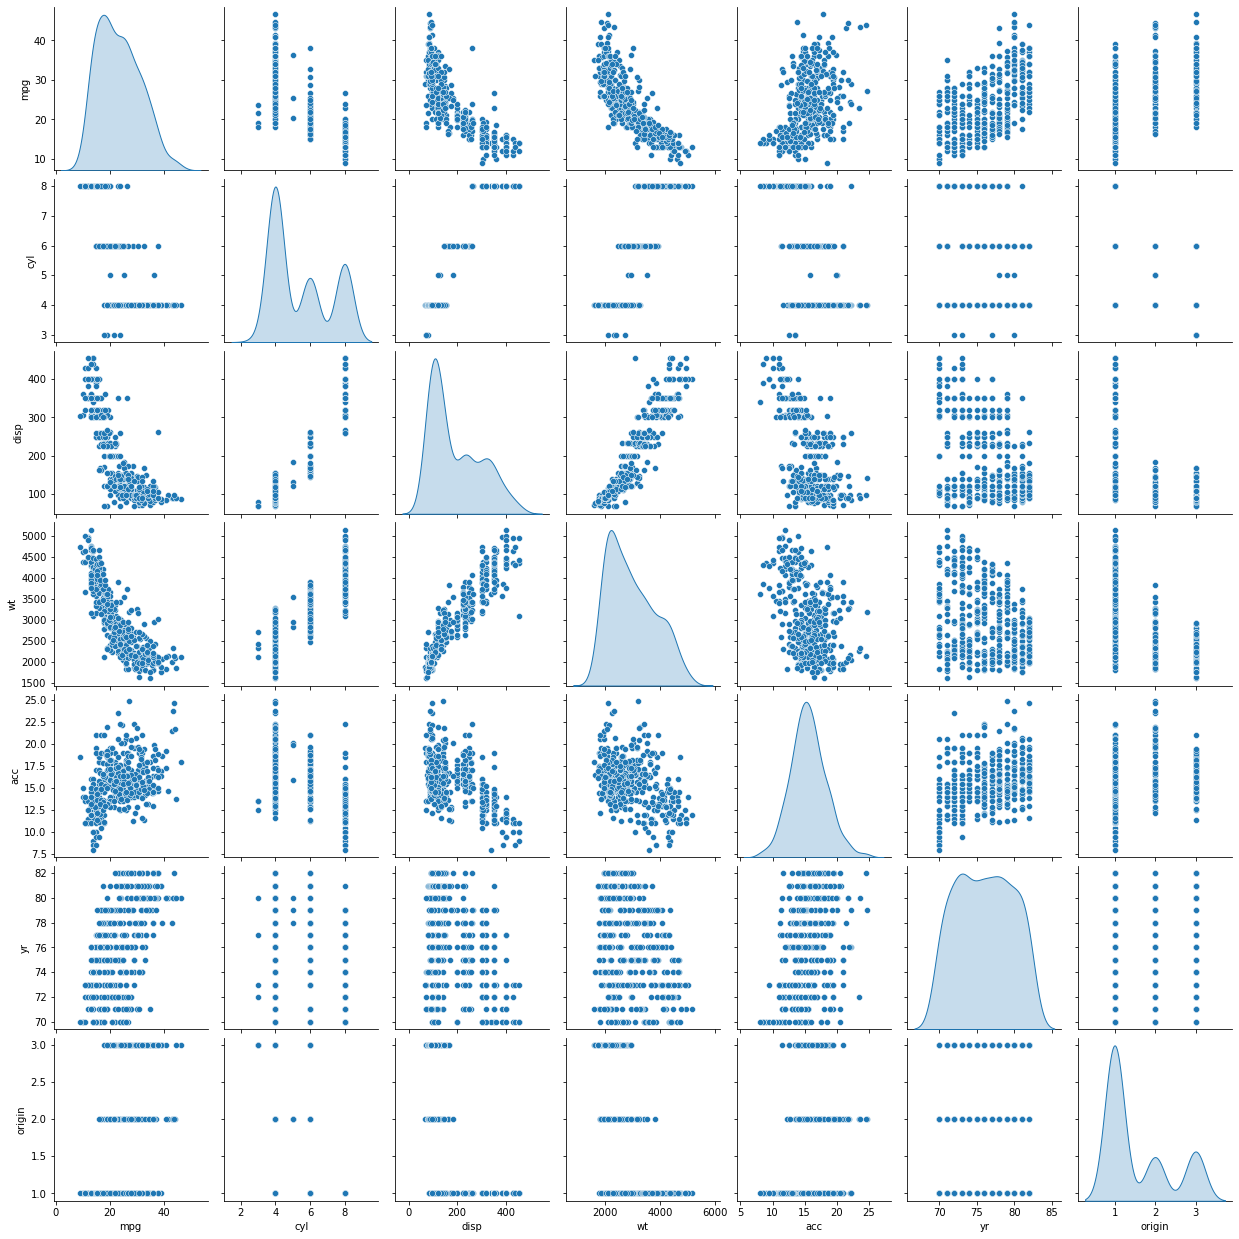

In [20]:
sns.pairplot(df, diag_kind="kde")

In [21]:
corr=df.corr()
corr

,mpg,cyl,disp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
wt,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


### mpg-cy,disp- negatively corr 
### cyl, disp- highly correalted - 0.95
### cyl, wt- higly correlated- 0.9
### disp, wt - highly correlated-   0.93
### wt,mpg- higly -ve correlated-    -0.83
### disp, mpg - highly -ve cirrelated -    -0.8
### cyl,mpg- higly -ve correlated-    -0.78

<AxesSubplot:>

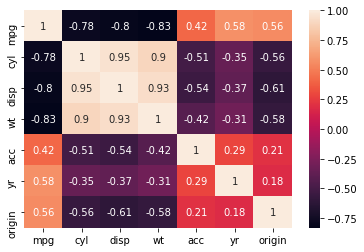

In [22]:
sns.heatmap(corr,annot=True)

# data analysis, manupulation

In [23]:
df=df.drop("car name",axis=1)
#dropping "car name" column since it is of no big use as it is of str type

In [24]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [25]:
df["origin"]=df["origin"].replace({1:"America",2:"Asia",3:"Europe"})
#replacing categircial 1s with repsective data

In [26]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


## One hot encoding

In [27]:
df=pd.get_dummies(df,columns=["origin"])
df.head()
#create new columns for new categorical

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [28]:
hpdigit=pd.DataFrame(df["hp"].str.isdigit())
#creates boolean dataframe 

In [29]:
hpdigit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hp      398 non-null    bool 
dtypes: bool(1)
memory usage: 526.0 bytes


In [30]:
df[hpdigit["hp"]==False]
#retunns rows of df which has strings in it

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [31]:
df["hp"]=df["hp"].replace('?',np.NaN)
df[hpdigit["hp"]==False]
#replace ? with Nan
#NOTE - Always update df with df.replace()

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [32]:
df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
origin_America       1.0
origin_Asia          0.0
origin_Europe        0.0
dtype: float64

In [33]:
df['hp']=df['hp'].astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              392 non-null    float64
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_Asia     398 non-null    uint8  
 9   origin_Europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


In [35]:
df=df.fillna(df.median())
#fill null values with medians of that column

### scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
stdscale=StandardScaler()
stdscale

StandardScaler()

In [38]:
df["cyl"]= stdscale. fit_transform(df[["cyl"]])
df["disp"]= stdscale. fit_transform(df[["disp"]])
df["hp"]= stdscale. fit_transform(df[["hp"]])
df["wt"]= stdscale. fit_transform(df[["wt"]])
df["acc"]= stdscale. fit_transform(df[["acc"]])

In [39]:
df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
0,18.0,1.498191,1.090604,0.673118,0.630870,-1.295498,70,1,0,0
33,19.0,0.320935,0.370411,-0.112746,-0.397770,-0.932419,71,1,0,0
131,32.0,-0.856321,-1.175603,-1.029586,-1.341281,1.972212,74,0,0,1
10,15.0,1.498191,1.820399,1.720935,0.700628,-2.021656,70,1,0,0
23,26.0,-0.856321,-0.695475,0.227795,-0.870708,-1.113959,70,0,1,0
35,17.0,0.320935,0.543257,-0.112746,0.423960,-0.024722,71,1,0,0
179,22.0,-0.856321,-0.695475,-0.165137,-0.030061,-0.387801,75,0,1,0
32,25.0,-0.856321,-0.916334,-0.283016,-1.092988,1.246054,71,1,0,0
41,14.0,1.498191,1.196232,1.197027,1.330818,-0.932419,71,1,0,0
370,31.0,-0.856321,-0.781898,-0.505677,-0.467528,0.229433,82,1,0,0


## split data

In [40]:
x=df.drop(["mpg"],axis=1)

In [41]:
y=df["mpg"]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# fit linear model


In [43]:
reg_model=LinearRegression()

### exp1

In [44]:
reg_model.fit(x_train,y_train)

LinearRegression()

In [45]:
reg_model.score(x_train,y_train)

0.8141025501610559

In [46]:
reg_model.score(x_test,y_test)

0.843313513280883

In [47]:
pred_train_lr= reg_model.predict(x_train)
print('train rms',np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print('reg_score',r2_score(y_train, pred_train_lr))

pred_test_lr= reg_model.predict(x_test)
print('rms_test',np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print('reg_score',r2_score(y_test, pred_test_lr))

train rms 3.3943230562019435
reg_score 0.8141025501610559
rms_test 3.0267110332771368
reg_score 0.843313513280883


### Here are the coefficients for each variable and the intercept

In [48]:
reg_model.coef_

array([-0.67072581,  3.0143497 , -0.83038131, -6.21818134,  0.1705397 ,
        0.83693389, -1.79884935,  1.20243366,  0.59641569])

### exp 2

In [49]:
x2=df.drop(["mpg","cyl",],axis=1)
y2=df["mpg"]

In [50]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.30,random_state=1)

In [51]:
reg_model.fit(x_train2,y_train2)

LinearRegression()

In [52]:
reg_model.score(x_test2,y_test2)
#train score increased from exp1

0.8415081730288689

In [53]:
reg_model.score(x_train2,y_train2)
#score reduce form exp1 

0.813501459816031

### exp 3

In [54]:
x3=df.drop(["mpg","cyl","disp"],axis=1)
y3=df["mpg"]

x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.30,random_state=1)

reg_model.fit(x_train3,y_train3)

reg_model.score(x_train3,y_train3)

reg_model.score(x_test3,y_test3)
#train score increased from exp1,2

0.8442106380309768

In [55]:
reg_model.score(x_train3,y_train3)
#got lower score than 1,2

0.8070549863555473

### exp 4

In [56]:
x4=df.drop(["mpg","cyl","disp","acc"],axis=1)
y4=df["mpg"]

x_train4,x_test4,y_train4,y_test4=train_test_split(x4,y4,test_size=0.30,random_state=1)

reg_model.fit(x_train4,y_train4)



reg_model.score(x_test4,y_test4)
#train score increased from exp1,2,3

0.8451964856669254

In [57]:
reg_model.score(x_train4,y_train4)
#lesser than exp 1,2,3

0.8070013661875717

### exp 5

In [58]:
x5=df.drop(["mpg","cyl","disp","acc"],axis=1)
y5=df["mpg"]

x_train5,x_test5,y_train5,y_test5=train_test_split(x5,y5,test_size=0.30,random_state=1)

reg_model.fit(x_train5,y_train5)

print(reg_model.score(x_train5,y_train5))

print(reg_model.score(x_test5,y_test5))
#score reduced---- dont remove origin column

0.8070013661875717
0.8451964856669254


## Polymonial fiiting

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
Xpol_train = poly.fit_transform(x_train)
Xpol_test = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(Xpol_train, y_train)

y_pred = poly_clf.predict(Xpol_test)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(Xpol_train, y_train))
print(poly_clf.score(Xpol_test, y_test))

0.8999822001947713
0.862012960982464


In [60]:
print(Xpol_train.shape)
print(Xpol_train.shape)

(278, 46)
(278, 46)


### ridge

rr train score 0.8141025259837886
rr test score 0.843328823575771
rr100 train score 0.7806098872862128
rr100 test score 0.8220432198398688


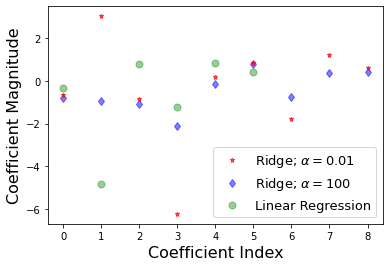

In [61]:

from sklearn.linear_model import Ridge



rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,

rr.fit(x_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(x_train, y_train)

Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)
print('rr train score',Ridge_train_score)
print('rr test score',Ridge_test_score)

Ridge_train_score100 = rr100.score(x_train,y_train)
Ridge_test_score100 = rr100.score(x_test, y_test)
print('rr100 train score',Ridge_train_score100)
print('rr100 test score',Ridge_test_score100)

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(reg_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [62]:
alphas = 10**np.linspace(100,-200,1000)*0.5
alphas

array([5.00000000e+099, 2.50420399e+099, 1.25420753e+099, 6.28158301e+098,
       3.14607305e+098, 1.57568174e+098, 7.89165703e+097, 3.95246381e+097,
       1.97955513e+097, 9.91441975e+096, 4.96554591e+096, 2.48694798e+096,
       1.24556501e+096, 6.23829776e+095, 3.12439404e+095, 1.56482401e+095,
       7.83727705e+094, 3.92522810e+094, 1.96591438e+094, 9.84610128e+093,
       4.93132923e+093, 2.46981087e+093, 1.23698205e+093, 6.19531078e+092,
       3.10286440e+092, 1.55404109e+092, 7.78327180e+091, 3.89818007e+091,
       1.95236762e+091, 9.77825358e+090, 4.89734834e+090, 2.45279185e+090,
       1.22845823e+090, 6.15262002e+089, 3.08148313e+089, 1.54333247e+089,
       7.72963868e+088, 3.87131841e+088, 1.93891421e+088, 9.71087341e+087,
       4.86360160e+087, 2.43589011e+087, 1.21999315e+087, 6.11022343e+086,
       3.06024919e+086, 1.53269765e+086, 7.67637514e+085, 3.84464186e+085,
       1.92555350e+085, 9.64395754e+084, 4.83008740e+084, 2.41910483e+084,
       1.21158640e+084, 6

In [63]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.0019795551332342336

In [64]:
rr_opt = Ridge(alpha=ridgecv.alpha_) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,

rr_opt.fit(x_train, y_train)

Ridge_train_score = rr_opt.score(x_train,y_train)
Ridge_test_score = rr_opt.score(x_test, y_test)
print('rr train score',Ridge_train_score)
print('rr test score',Ridge_test_score)

rr train score 0.8141025492119106
rr test score 0.8433165529050253


### ridge for polynomial function

rr train score 0.9020840004072748
rr test score 0.8723706760565946
rr100 train score 0.8770534977211216
rr100 test score 0.8692647781601969


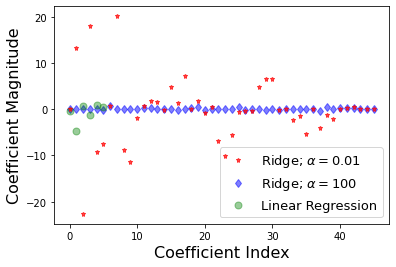

In [65]:
from sklearn.linear_model import Ridge



rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,

rr.fit(Xpol_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(Xpol_train, y_train)

Ridge_train_score = rr.score(Xpol_train,y_train)
Ridge_test_score = rr.score(Xpol_test, y_test)
print('rr train score',Ridge_train_score)
print('rr test score',Ridge_test_score)

Ridge_train_score100 = rr100.score(Xpol_train,y_train)
Ridge_test_score100 = rr100.score(Xpol_test, y_test)
print('rr100 train score',Ridge_train_score100)
print('rr100 test score',Ridge_test_score100)

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(reg_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [66]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(Xpol_train, y_train)
ridgecv.alpha_

0.0019795551332342336

In [67]:
rr_opt_pol = Ridge(alpha=ridgecv.alpha_) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,

rr_opt_pol.fit(Xpol_train, y_train)

Ridge_train_score = rr_opt_pol.score(Xpol_train,y_train)
Ridge_test_score = rr_opt_pol.score(Xpol_test, y_test)
print('rr train score',Ridge_train_score)
print('rr test score',Ridge_test_score)

rr train score 0.9025980105588106
rr test score 0.8684942150464441


### lasso

training score: 0.7821339196681276
test score:  0.8150692172957735
number of features used:  2 

training score for alpha=0.01: 0.8138902551955064
test score for alpha =0.01:  0.8443036351232704
number of features used: for alpha =0.01: 8 

training score for alpha=0.0001: 0.8141025311857708
test score for alpha =0.0001:  0.8433264957714305
number of features used: for alpha =0.0001: 8 



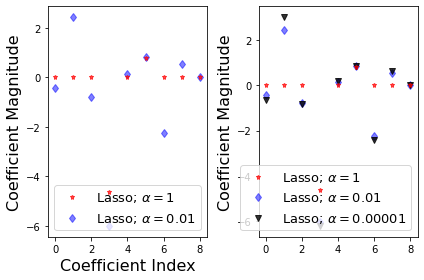

In [68]:

from sklearn.linear_model import Lasso


lasso = Lasso()
lasso.fit(x_train,y_train)

train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)

coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used,'\n')

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)
train_score001=lasso001.score(x_train,y_train)
test_score001=lasso001.score(x_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001,'\n')

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train,y_train)
train_score00001=lasso00001.score(x_train,y_train)
test_score00001=lasso00001.score(x_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001,'\n')


plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency

plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()



In [69]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
mean_squared_error(y_test, lasso.predict(x_test))

train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)


print("training score:", train_score)
print("test score: ", test_score)


training score: 0.8140904138241625
test score:  0.8436090371829231


### lasso for polynomial function

training score: 0.8451818378127989
test score:  0.8691433363010598
number of features used:  9 

training score for alpha=0.01: 0.8932393017041923
test score for alpha =0.01:  0.8758949756658416
number of features used: for alpha =0.01: 24 

training score for alpha=0.0001: 0.9026310573471795
test score for alpha =0.0001:  0.8678493735844922
number of features used: for alpha =0.0001: 39 



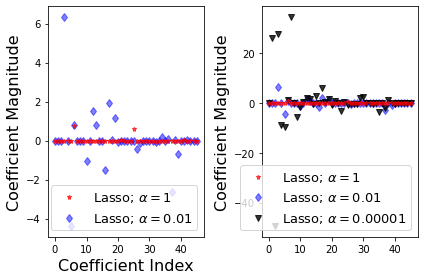

In [70]:
from sklearn.linear_model import Lasso


lasso = Lasso()
lasso.fit(Xpol_train,y_train)

train_score=lasso.score(Xpol_train,y_train)
test_score=lasso.score(Xpol_test,y_test)

coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used,'\n')

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(Xpol_train,y_train)
train_score001=lasso001.score(Xpol_train,y_train)
test_score001=lasso001.score(Xpol_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001,'\n')

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(Xpol_train,y_train)
train_score00001=lasso00001.score(Xpol_train,y_train)
test_score00001=lasso00001.score(Xpol_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001,'\n')


plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency

plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


In [71]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(Xpol_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(Xpol_train, y_train)
mean_squared_error(y_test, lasso.predict(Xpol_test))

train_score=lasso.score(Xpol_train,y_train)
test_score=lasso.score(Xpol_test,y_test)


print("training score:", train_score)
print("test score: ", test_score)


training score: 0.8931514996722907
test score:  0.8728168227964919


C:\Users\NAZEERUDDIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 947.4015235008725, tolerance: 1.7229699856115106
  model = cd_fast.enet_coordinate_descent(


## Elasticnet

In [72]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred_train_enet= model_enet.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print('reg train score',r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('reg test score',r2_score(y_test, pred_test_enet))

3.3997644873345374
reg train score 0.8135060489091233
3.0143751057253136
reg test score 0.8445881207568465


### polynomial Elasticnet

In [73]:
model_enet = ElasticNet(alpha = 0.00001)
model_enet.fit(Xpol_train, y_train) 
pred_train_enet= model_enet.predict(Xpol_train)
print('rms pol train error',np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print('reg pol train score',r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(Xpol_test)
print('rms pol test error',np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('reg pol test score',r2_score(y_test, pred_test_enet))

C:\Users\NAZEERUDDIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 881.316276226677, tolerance: 1.7229699856115106
  model = cd_fast.enet_coordinate_descent(


rms pol train error 2.517207195518176
reg pol train score 0.8977637260760726
rms pol test error 2.6649558222657013
reg pol test score 0.8785298267332347


In [74]:
from sklearn.linear_model import ElasticNetCV
ElasticNetcv = ElasticNetCV(alphas = None, cv = 100, max_iter = 100000, normalize = True)
ElasticNetcv.fit(Xpol_train, y_train)

ElasticNetcv.alpha_

0.0007854341115112496

In [75]:
model_enet = ElasticNet(alpha = 0.0007854341115112496)
model_enet.fit(Xpol_train, y_train) 
pred_train_enet= model_enet.predict(Xpol_train)
print('rms pol train error',np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print('reg pol train score',r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(Xpol_test)
print('rms pol test error',np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('reg pol test score',r2_score(y_test, pred_test_enet))

rms pol train error 2.5274288369552864
reg pol train score 0.8969317371154053
rms pol test error 2.6779126290483792
reg pol test score 0.8773457984222685


C:\Users\NAZEERUDDIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 906.8295248016165, tolerance: 1.7229699856115106
  model = cd_fast.enet_coordinate_descent(


#  Random forests

In [76]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.94 degrees.


In [77]:
print('Randomforest train',rf.score(x_train,y_train))
print('Randomforest test',rf.score(x_test,y_test))

Randomforest train 0.9821353893555634
Randomforest test 0.8719018623843438


In [78]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.61 %.


###  Random forests poly

In [79]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(Xpol_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(Xpol_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.97 degrees.


In [80]:
print('Randomforest pol train',rf.score(Xpol_train,y_train))
print('Randomforest pol test',rf.score(Xpol_test,y_test))

Randomforest pol train 0.9817248155446978
Randomforest pol test 0.8723783787048903


In [81]:
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.58 %.


## Decision Trees

In [82]:
from sklearn.tree import DecisionTreeRegressor
  
 # create regressor object
regressor = DecisionTreeRegressor(criterion="friedman_mse",max_depth=6)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)

print(regressor.score(x_train,y_train))
print(regressor.score(x_test,y_test))

0.9579381781739855
0.7560896796016232


In [83]:
max_score_test=0.0
i_max=0
for i in range(1,30):
    regressor=DecisionTreeRegressor(criterion="friedman_mse",random_state=1,max_depth=i)
    regressor.fit(x_train,y_train)
    if regressor.score(x_test,y_test)>max_score_test:
        max_score_test=regressor.score(x_test,y_test)
        max_score_train=regressor.score(x_train,y_train)
        i_max=i
print(max_score_test)
print(max_score_train)
print(i_max)


0.7892652919447365
0.8252713272277856
3


### decision tree for Polynomial data

In [84]:
from sklearn.tree import DecisionTreeRegressor
  
 # create regressor object
regressor = DecisionTreeRegressor(criterion="friedman_mse",max_depth=6)
  
# fit the regressor with x and y data
regressor.fit(Xpol_train, y_train)

print(regressor.score(Xpol_train,y_train))
print(regressor.score(Xpol_test,y_test))

0.9654801327045924
0.7020772600524315


In [85]:
max_score_test=0.0
i_max=0
for i in range(1,30):
    regressor=DecisionTreeRegressor(criterion="friedman_mse",random_state=1,max_depth=i)
    regressor.fit(Xpol_train,y_train)
    if regressor.score(Xpol_test,y_test)>max_score_test:
        max_score_test=regressor.score(Xpol_test,y_test)
        max_score_train=regressor.score(Xpol_train,y_train)
        i_max=i
print(max_score_test)
print(max_score_train)
print(i_max)


0.8229547321792563
0.8401202383403168
3


# Final Model

## ElasticNet- Alpha = 0.00001, polynomial function

In [86]:
model_enet = ElasticNet(alpha = 0.00001)
model_enet.fit(Xpol_train, y_train) 
pred_train_enet= model_enet.predict(Xpol_train)
print('rms pol train error',np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print('reg pol train score',r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(Xpol_test)
print('rms pol test error',np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('reg pol test score',r2_score(y_test, pred_test_enet))

rms pol train error 2.517207195518176
reg pol train score 0.8977637260760726
rms pol test error 2.6649558222657013
reg pol test score 0.8785298267332347


C:\Users\NAZEERUDDIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 881.316276226677, tolerance: 1.7229699856115106
  model = cd_fast.enet_coordinate_descent(


### Test score= 0.8785298267332347
### Train Score= 0.8977637260760726

### RMS error 
test data= 2.6649558222657013
Train data = 2.517207195518176